<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/articulos/Gradient_Descent_for_Linear_Regression_Part_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient Descent for Linear Regression. Part 1/2**
#### **Understanding the Algorithm and Basic Implementation**

<a href="https://github.com/magnitopic" target="_blank"><img src="https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white" alt="GitHub" style="display: inline-block; vertical-align: middle; margin-right: 10px;"/></a><a href="https://www.kaggle.com/magnitopic" target="_blank"><img src="https://img.shields.io/badge/Kaggle-20BEFF?style=flat&logo=kaggle&logoColor=white" alt="Kaggle" style="display: inline-block; vertical-align: middle; margin-right: 10px;"/></a><a href="https://www.linkedin.com/in/magnitopic" target="_blank"><img src="https://img.shields.io/badge/LinkedIn-0A66C2?style=flat&logo=linkedin&logoColor=white" alt="LinkedIn" style="display: inline-block; vertical-align: middle; margin-right: 10px;"/></a>

> **Esta es la Parte 1 de 2 en nuestra serie sobre Gradient Descent.**
> Aquí aprenderás la intuición, las matemáticas esenciales y la implementación básica del algoritmo. Para dominar los hiperparámetros, el escalado de características y las implementaciones profesionales, asegúrate de visitar la Parte 2 después de completar este notebook.

El Descenso del Gradiente es el motor de optimización detrás de prácticamente todo el Machine Learning moderno. En este artículo, aprenderás cómo funciona este algoritmo aplicándolo a la Regresión Lineal, combinando teoría accesible con código práctico para que entiendas **por qué funciona** y **cómo implementarlo** paso a paso.

Al final de este artículo, habrás construido tu propio algoritmo de Gradient Descent desde cero y entenderás la base sobre la que se construyen las redes neuronales.

---

## 1. Introducción: ¿Qué problema queremos resolver?

En el corazón del Machine Learning y la Ciencia de Datos se encuentra una tarea fundamental: la **optimización**. Queremos encontrar los mejores parámetros posibles para que nuestro modelo haga predicciones precisas.

Empecemos con un ejemplo clásico y concreto: **predecir el precio de una vivienda basándonos en su tamaño.**

### El problema de predicción

Imagina que tenemos un conjunto de datos de casas. Para cada casa, conocemos su tamaño en metros cuadrados (nuestra variable $x$) y el precio final por el que se vendió (nuestra variable $y$). Si visualizamos estos datos en un gráfico, probablemente veremos una "nube de puntos" que tiende a ir hacia arriba: a más metros cuadrados, mayor es el precio.

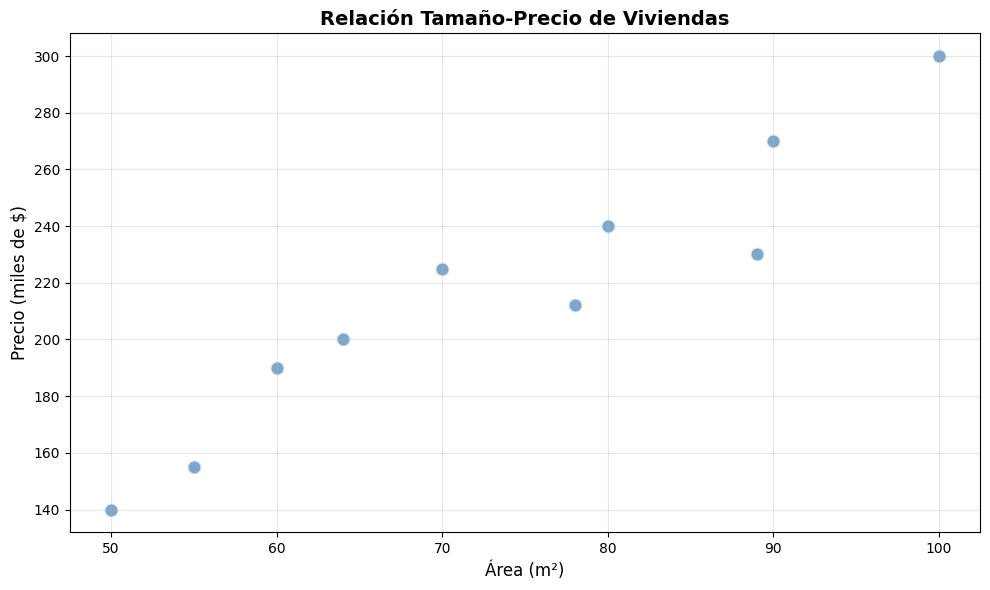

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: tamaño de viviendas vs precio
area = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
precio = np.array([140000, 155000, 190000, 200000, 225000,
                  212000, 240000, 230000, 270000, 300000])

plt.figure(figsize=(10, 6))
plt.scatter(area, precio/1000, alpha=0.7, s=100, color='steelblue', edgecolors='white', linewidth=1.5)
plt.xlabel('Área (m²)', fontsize=12)
plt.ylabel('Precio (miles de $)', fontsize=12)
plt.title('Relación Tamaño-Precio de Viviendas', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Nuestro objetivo es trazar **una línea recta** que represente de la mejor forma posible la tendencia de esos puntos. Esta línea será nuestro "modelo" de Regresión Lineal. ¿Por qué? Porque una vez que tengamos esa línea, si alguien nos da un nuevo tamaño ($x$) de una casa que no estaba en nuestros datos, podremos "consultar" la línea para estimar su precio ($y$).

### La ecuación de nuestro modelo

Como recordarás de tus clases de matemáticas, la ecuación de una línea recta es $y = b + mx$. En Machine Learning, usamos una notación ligeramente diferente pero que significa exactamente lo mismo:

$$\hat{y} = w_0 + w_1 x$$

Vamos a analizar estos términos, ya que los usaremos durante todo el artículo:

* **$x$**: Es nuestra variable de entrada (el *feature*), en este caso, el tamaño de la casa.
* **$\hat{y}$** (se pronuncia "y-sombrero" o "y-gorro"): Es la **predicción** de nuestro modelo (el precio estimado). La distinguimos de la $y$ real (el precio de venta verdadero).
* **$w_0$**: Es el **sesgo** (del inglés *bias* o *intercept*). Es la ordenada en el origen. Representa el precio base que tendría nuestra predicción si $x$ fuera 0.
* **$w_1$**: Es el **peso** (del inglés *weight*). Es equivalente a la pendiente. Nos dice cuánto cambia $\hat{y}$ (precio) por cada unidad que aumenta $x$ (metro cuadrado).

**Nuestro objetivo:** Encontrar los valores de $w_0$ y $w_1$ que nos den la recta que mejor se ajuste a la nube de puntos.

### La pregunta fundamental: ¿Cómo encontramos los mejores parámetros?

De todas las rectas posibles (infinitas combinaciones de $w_0$ y $w_1$), ¿cómo encontramos la que **"mejor se ajusta"** a los datos? ¿Qué significa "la mejor"?

**Hay dos enfoques principales para resolver este problema:**

#### 1. **La Solución Cerrada (Normal Equation)**
Existe una fórmula matemática directa que calcula los parámetros óptimos en un solo paso:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Esta fórmula es exacta, rápida para datasets pequeños, y la aprendiste en detalle en nuestro artículo anterior sobre [Linear Regression from Scratch - Part 1](https://www.kaggle.com/code/magnitopic/linear-regression-from-scratch-in-python-part-1-2).

**Ventajas:**
- Solución exacta en una sola operación
- No requiere ajustar hiperparámetros
- Perfecta para datasets pequeños y medianos

**Limitaciones:**
- Requiere invertir una matriz, operación de complejidad $O(n^3)$
- Computacionalmente prohibitiva para datasets con millones de filas o miles de características
- Requiere cargar todos los datos en memoria
- No funciona si la matriz $\mathbf{X}^T \mathbf{X}$ es singular (no invertible)

#### 2. **El Descenso del Gradiente (Gradient Descent)**
Un algoritmo iterativo que "busca" los mejores parámetros mediante pasos sucesivos, mejorando gradualmente la solución.

**Ventajas:**
- Escala a datasets de cualquier tamaño (millones de filas, miles de características)
- Funciona con datos que no caben en memoria (procesamiento por lotes)
- Es la base de prácticamente todo el Deep Learning
- Permite actualización continua del modelo (online learning)
- Funciona para problemas no lineales y redes neuronales

**¿Cuándo necesitamos Gradient Descent?**

| Situación | Solución Cerrada | Gradient Descent |
|:----------|:-----------------|:-----------------|
| < 10,000 filas, < 100 características | ↑↑ Óptimo | ~ Funciona pero innecesario |
| 10,000 - 100,000 filas | ↑ Funciona | ↑ Buena opción |
| > 100,000 filas o > 1,000 características | ↓ Muy lento/inestable | ↑↑ **Necesario** |
| Datos que no caben en RAM | ✗ Imposible | ↑↑ **Única opción** |
| Redes Neuronales | ✗ No aplicable | ↑↑ **Única opción** |
| Necesitas online learning | ✗ No aplicable | ↑↑ **Única opción** |

### ¿Por qué aprender Gradient Descent si existe la solución cerrada?

Esta es una pregunta legítima. La respuesta tiene tres partes:

**1. Escalabilidad real:** Los problemas del mundo real suelen tener cientos de miles o millones de observaciones. En estos casos, la solución cerrada simplemente no es viable.

**2. Fundamento del Deep Learning:** Cada red neuronal que existe (desde modelos de visión por computadora hasta GPT) utiliza alguna variante del Gradient Descent. No puedes entender Deep Learning sin entender Gradient Descent.

**3. Generalidad:** Gradient Descent funciona para optimizar prácticamente cualquier función diferenciable. La solución cerrada solo existe para unos pocos problemas específicos (como la regresión lineal con MSE).

### ¿Qué aprenderás en este notebook?

Al completar este artículo, serás capaz de:

- Entender la **intuición geométrica** del Gradient Descent (sin matemáticas complejas)
- Comprender las **matemáticas esenciales**: qué es el gradiente y por qué "descender" funciona
- **Implementar el algoritmo desde cero** en Python con NumPy
- **Visualizar el proceso de optimización** y entender qué está pasando internamente
- Reconocer cuándo usar Gradient Descent vs la solución cerrada

En la **Parte 2**, llevaremos este conocimiento al siguiente nivel: dominarás los hiperparámetros críticos (learning rate), entenderás por qué el escalado de características es esencial, compararás tu implementación con scikit-learn, y extenderás el algoritmo a múltiples variables.

Pero primero, necesitamos responder una pregunta fundamental: ¿cómo medimos qué tan "buena" o "mala" es una línea? Para eso, necesitamos una **Función de Costes**.

---